# Bangalore House Price Prediction : EDA and Machine Learning

## Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [105]:
df = pd.read_csv(r'C:\Users\ankus\OneDrive\Desktop\Py_Workshop\Bang_House_ML\Bengaluru_House_Dataset.csv')


In [106]:
df.head() # Top 5 Row

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Preprocessing

In [107]:
df.shape # How many Row and Col

(13320, 9)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [109]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [110]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [111]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [112]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

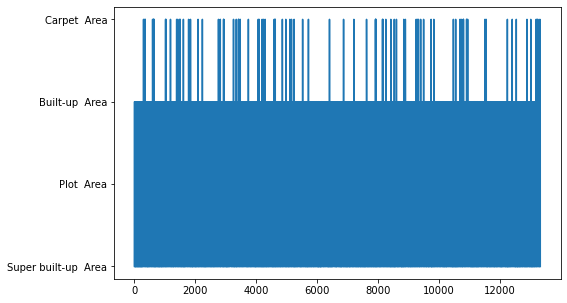

In [113]:
plt.plot(df['area_type'])
plt.show()

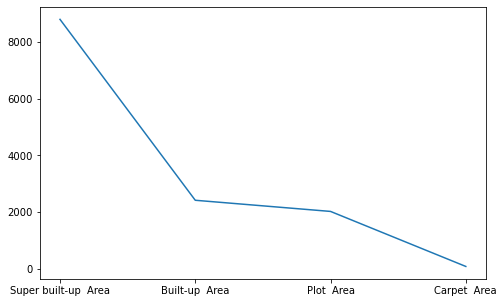

In [114]:
plt.plot(df['area_type'].value_counts())
plt.show()

C:\Users\ankus\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


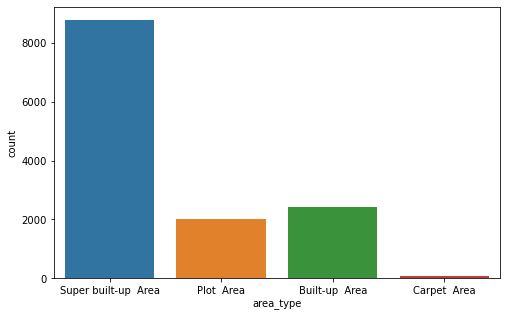

In [115]:
sns.countplot(df['area_type'])
plt.show()

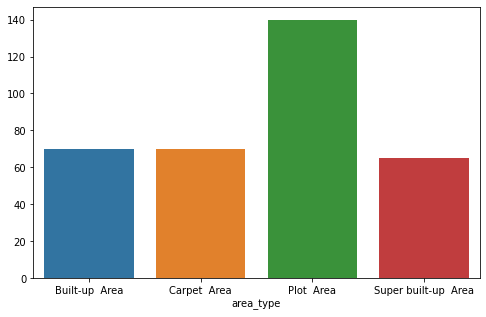

In [116]:
temp=df.groupby('area_type')['price'].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

In [117]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Nov               1
15-Jun               1
16-Oct               1
15-Aug               1
16-Nov               1
Name: availability, Length: 81, dtype: int64

In [118]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

C:\Users\ankus\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


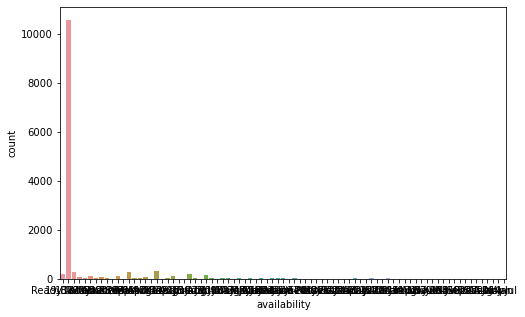

In [119]:
sns.countplot(df['availability'])
plt.rcParams['figure.figsize']=8,5
plt.show()

In [120]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [121]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
19 BHK           1
12 Bedroom       1
13 BHK           1
43 Bedroom       1
14 BHK           1
27 BHK           1
16 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [122]:
df['size'].isna().sum()

16

C:\Users\ankus\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


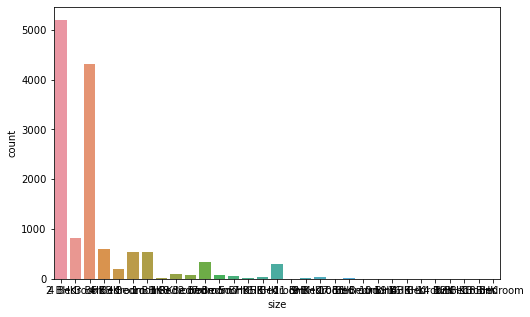

In [123]:
sns.countplot(df['size'])
plt.rcParams['figure.figsize']=8,5
plt.show()

In [124]:
for column in df.columns:
    print(df[column].value_counts())
    print("******************************")

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
******************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Nov               1
15-Jun               1
16-Oct               1
15-Aug               1
16-Nov               1
Name: availability, Length: 81, dtype: int64
******************************
Whitefield                                            540
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
                                                     ... 
Prasanth Extension                                      1
 Banaswadi                                              1
bsk 6th stage 2ad block near s

Check NULL values

In [125]:
df.isna().sum()  # df.isnull.sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [126]:
df.drop(columns=["area_type","availability","society","balcony"],axis=1,inplace=True)

In [127]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [128]:
df.describe() # Numerical values we have only two  

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [130]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [131]:
df['location'].value_counts()

Whitefield                                            540
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
                                                     ... 
Prasanth Extension                                      1
 Banaswadi                                              1
bsk 6th stage 2ad block near sri conversation hall      1
Jayanagar,                                              1
Narayanappa Layout                                      1
Name: location, Length: 1305, dtype: int64

In [132]:
df['price'].value_counts()

75.00    310
65.00    302
55.00    275
60.00    270
45.00    240
        ... 
81.55      1
69.49      1
42.18      1
70.25      1
74.82      1
Name: price, Length: 1994, dtype: int64

C:\Users\ankus\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


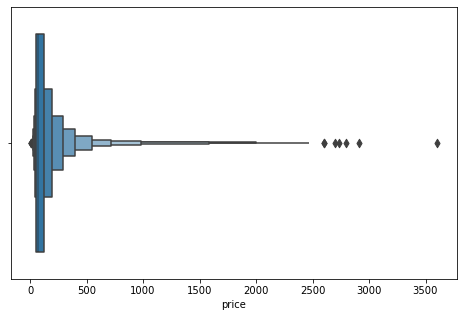

In [133]:
sns.boxenplot(df['price'])
plt.rcParams['figure.figsize']=8,5
plt.show()

In [134]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

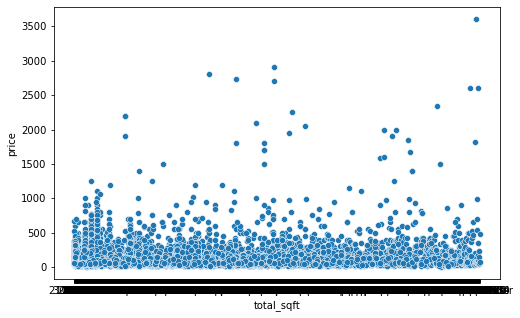

In [135]:
sns.scatterplot(x='total_sqft',y='price',data=df)
plt.show()

# Fill the missing values

In [136]:
df['location'].isna().sum()

1

In [137]:
df['location'].value_counts()

Whitefield                                            540
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
                                                     ... 
Prasanth Extension                                      1
 Banaswadi                                              1
bsk 6th stage 2ad block near sri conversation hall      1
Jayanagar,                                              1
Narayanappa Layout                                      1
Name: location, Length: 1305, dtype: int64

In [138]:
df['location']=df['location'].fillna('Sarjapur  Road')

In [139]:
df.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [140]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
19 BHK           1
12 Bedroom       1
13 BHK           1
43 Bedroom       1
14 BHK           1
27 BHK           1
16 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [141]:
df['size']=df['size'].fillna('2 BHK')

In [142]:
df.isnull().sum()

location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [143]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [144]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [145]:
df.shape

(13320, 5)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [147]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [148]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [149]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [150]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [151]:
df.drop(columns=["size"],axis=1,inplace=True)

In [152]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [153]:
df.shape

(13320, 5)

In [154]:
df[df.bhk>20]  # Its Actually Outlier

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [155]:
df['total_sqft'].value_counts()

1200           843
1100           221
1500           205
2400           196
600            180
              ... 
2220             1
1500Cents        1
871              1
1100 - 1225      1
502              1
Name: total_sqft, Length: 2117, dtype: int64

In [156]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [157]:
df.shape

(13320, 5)

# some vlaues in ranges therfore concert  it only one value float

In [158]:
def convert_sqft_into_number(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1])) / 2
    try:
        return float(x)
    except:
        return None

In [159]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_into_number)

In [160]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [161]:
df.shape

(13320, 5)

In [162]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [163]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


## Price per square feet

In [164]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']

In [165]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [166]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [167]:
df['location'].value_counts()

Whitefield                                            540
Sarjapur  Road                                        400
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
                                                     ... 
Prasanth Extension                                      1
 Banaswadi                                              1
bsk 6th stage 2ad block near sri conversation hall      1
Jayanagar,                                              1
Narayanappa Layout                                      1
Name: location, Length: 1305, dtype: int64

Remove the spaces in loaction " Before and After"

In [168]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_count=df['location'].value_counts()

In [169]:
location_count

Whitefield          541
Sarjapur  Road      400
Electronic City     304
Kanakpura Road      273
Thanisandra         237
                   ... 
Govindraja Nagar      1
Anantapuram           1
Hoskote near          1
Chaitanya Ananya      1
Junnasandra           1
Name: location, Length: 1294, dtype: int64

In [170]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [171]:
df.shape

(13320, 6)

C:\Users\ankus\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


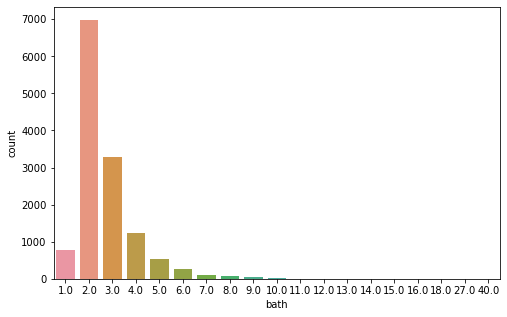

In [172]:
sns.countplot(df['bath'])
plt.show()

C:\Users\ankus\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


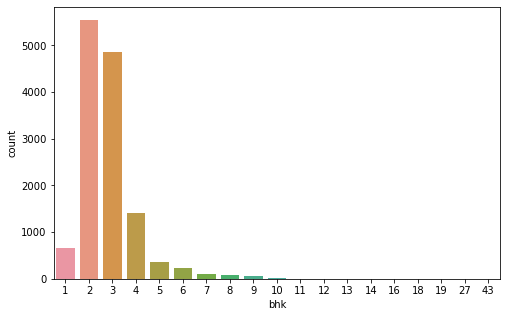

In [173]:
sns.countplot(df['bhk'])
plt.show()

In [174]:
df.head(2)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615


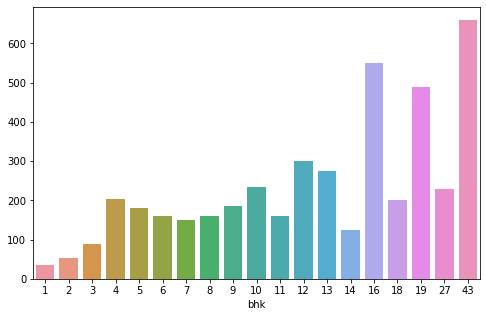

In [175]:
temp=df.groupby('bhk')['price'].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

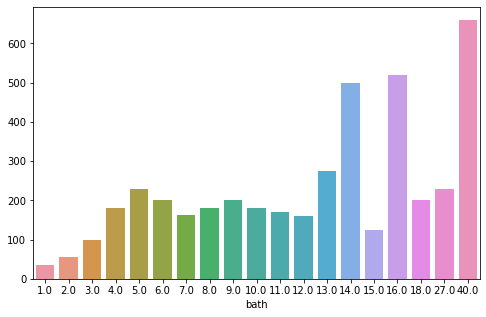

In [176]:
temp=df.groupby('bath')['price'].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

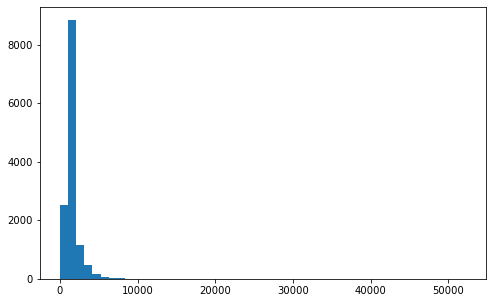

In [177]:
plt.hist(df['total_sqft'],bins=50)
plt.show()

C:\Users\ankus\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


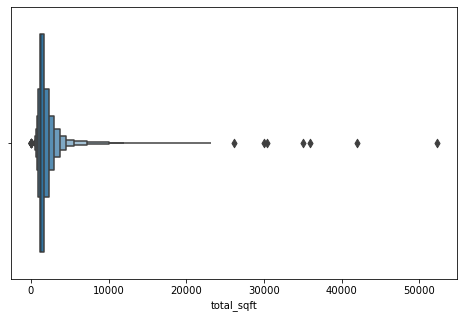

In [178]:
sns.boxenplot(df['total_sqft'])
plt.show()

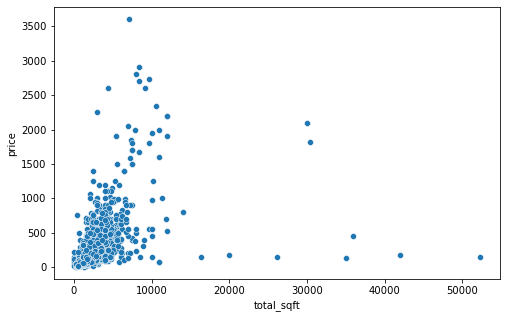

In [179]:
sns.scatterplot(x='total_sqft',y='price',data=df)
plt.show()

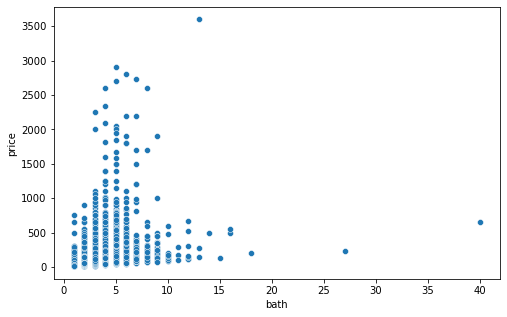

In [180]:
sns.scatterplot(x='bath',y='price',data=df)
plt.show()

C:\Users\ankus\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


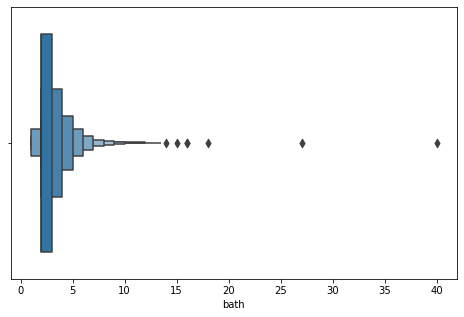

In [181]:
sns.boxenplot(df['bath'])
plt.show()

In [182]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [183]:
df.shape

(13320, 6)

## Finding location less than 10

In [184]:
loc_less_than_10 = location_count[location_count<=10]
loc_less_than_10

BTM 1st Stage       10
Naganathapura       10
Basapura            10
Sadashiva Nagar     10
Kalkere             10
                    ..
Govindraja Nagar     1
Anantapuram          1
Hoskote near         1
Chaitanya Ananya     1
Junnasandra          1
Name: location, Length: 1053, dtype: int64

## Chenage this all location less than 10 with Others

In [185]:
df.location = df.location.apply(lambda x: 'other' if x in loc_less_than_10 else x)
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [186]:
df.shape

(13320, 6)

In [187]:
len(df.location.unique())

242

### Prvious Unique Location : 1053 now its only 242

In [188]:
df['location'].value_counts()

other                 2885
Whitefield             541
Sarjapur  Road         400
Electronic City        304
Kanakpura Road         273
                      ... 
Tindlu                  11
LB Shastri Nagar        11
Pattandur Agrahara      11
Banjara Layout          11
Marsur                  11
Name: location, Length: 242, dtype: int64

## Outlier 

In [189]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


### Finding the area required for 1BHK

In [190]:
(df['total_sqft'] / df['bhk']).describe() # One BHK sq_ft Area

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [191]:
#Outlier: 1BHK who area less than 300sqft#

In [192]:
df[(df.total_sqft / df.bhk < 300) ].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [193]:
df = df[((df['total_sqft'] / df['bhk'])>= 300) ]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [194]:
df.shape

(12530, 6)

In [195]:
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [196]:
def remove_outlier_from_price_per_sqft(df):
    df_out = pd.DataFrame()
    for key,sub in df.groupby('location'): # for evey location , find sub data and then apply filter on sub data
        m = np.mean( sub.price_per_sqft ) # mean
        st = np.std( sub.price_per_sqft ) # std deviation
        reduce_df = sub[( sub.price_per_sqft>(m-st) ) & ( sub.price_per_sqft<=(m+st) ) ] # keep +1 and -1
        df_out = pd.concat( [df_out, reduce_df],ignore_index=True )
    return df_out

# Remove Outlier as per price per sqft

In [197]:
df.shape

(12530, 6)

In [198]:
df = remove_outlier_from_price_per_sqft(df)
df.shape

(10301, 6)

In [199]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


# Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques

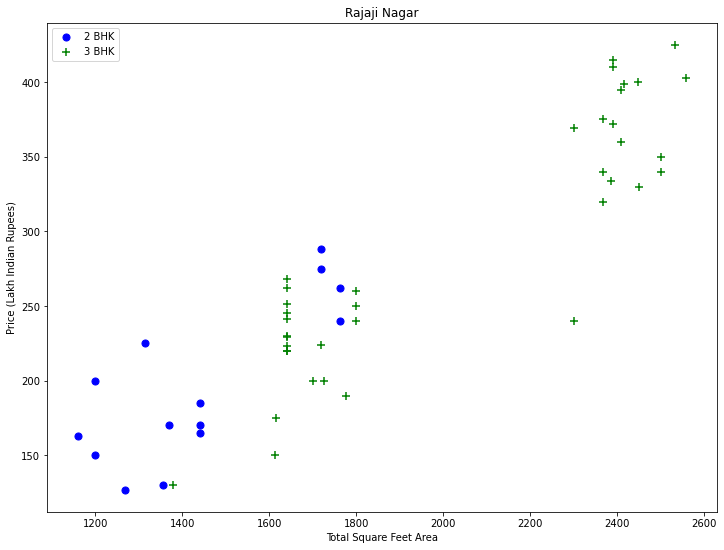

In [200]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (12,9)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

###### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
    
        'mean': 4000,  
        'std: 2000, 
        'count': 34
    },
    
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
###### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [202]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([]) # make an array that we dont want 
    for location, location_df in df.groupby('location'):
        bhk_stats = {}                                   # dict
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [203]:
df.shape

(10301, 6)

In [204]:
df = remove_bhk_outliers(df)
df.shape

(7360, 6)

In [205]:
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10292,other,1200.0,2.0,70.0,2,5833.333333
10293,other,1800.0,1.0,200.0,1,11111.111111
10296,other,1353.0,2.0,110.0,2,8130.081301
10297,other,812.0,1.0,26.0,1,3201.970443


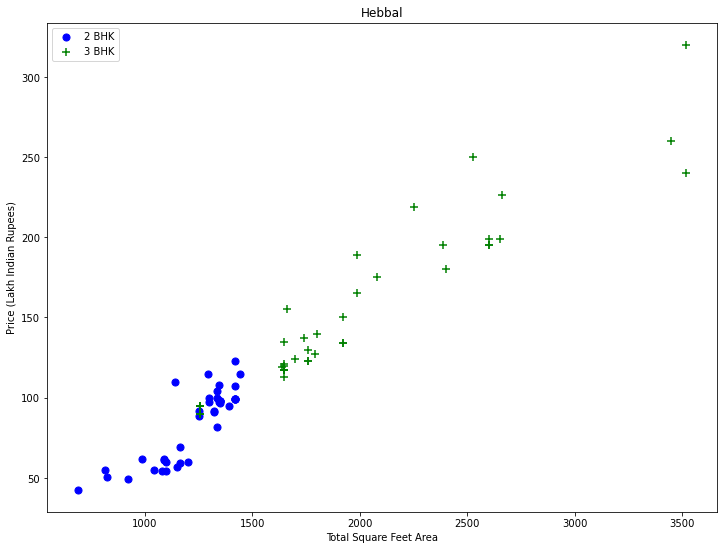

In [206]:
plot_scatter_chart(df,"Hebbal")

In [207]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [208]:
df[df.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5313,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8543,other,12000.0,12.0,525.0,10,4375.000000
8632,other,10000.0,16.0,550.0,16,5500.000000
9365,other,6000.0,12.0,150.0,11,2500.000000
9697,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

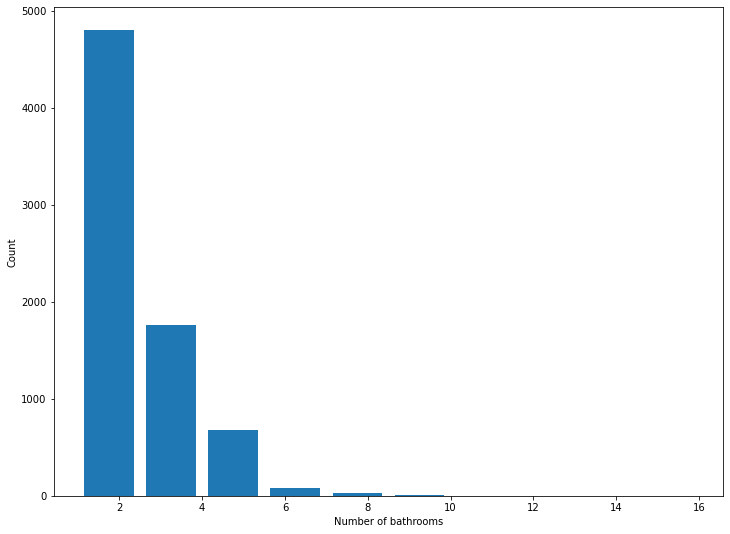

In [209]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [210]:
df[(df.bath > df.bhk+2)]

,location,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5274,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6760,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8468,other,11338.0,9.0,1000.0,6,8819.897689


In [211]:
df = df[~(df.bath > df.bhk+2)]
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [212]:
df.shape

(7356, 6)

In [213]:
df = df.drop(['price_per_sqft'],axis='columns')
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Saving clean data file for future ref

In [214]:
df.to_csv('Cleaned_data.csv')

In [217]:
data=df
df_old=df

In [218]:
x = data.drop(columns=['price'])
y = data['price']

# Apply ML Model

In [231]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Apply Spliting of data

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [221]:
X_train.head()

,location,total_sqft,bath,bhk
9401,other,1835.0,3.0,3
6703,Thanisandra,2072.0,3.0,3
3158,Hennur Road,973.0,2.0,2
4845,Lakshminarayana Pura,1195.0,2.0,2
1,1st Block Jayanagar,1630.0,3.0,3


In [222]:
X_test.head()

,location,total_sqft,bath,bhk
8604,other,1584.0,3.0,4
9661,other,801.0,1.0,1
6843,Tindlu,1357.0,2.0,3
9095,other,1200.0,1.0,1
8615,other,1340.0,3.0,3


# Internally convert location type numerical value using OneHotEncoding

In [223]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']), remainder='passthrough')

In [224]:
scaler=StandardScaler()

In [225]:
lr = LinearRegression(normalize=True)

In [226]:
pipe=make_pipeline(column_trans,scaler,lr)

In [227]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [228]:
y_pred_lr = pipe.predict(X_test)

# Final Accuary of LR Model

In [229]:
r2_score(y_test,y_pred_lr)

0.82025380616836

## Apply LASSO

In [234]:
lasso=Lasso()
pipe=make_pipeline(column_trans,scaler,lasso)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [235]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8067990731357804

# Apply Ridge

In [236]:
ridge=Ridge()
pipe=make_pipeline(column_trans,scaler,ridge)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [237]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8202819992548441

# Accuary of all three Approach

In [238]:
print(" LR with no Regularization",r2_score(y_test,y_pred_lr))
print(" Lasso",r2_score(y_test,y_pred_lasso))
print(" Ridge ",r2_score(y_test,y_pred_ridge))

 LR with no Regularization 0.82025380616836
 Lasso 0.8067990731357804
 Ridge  0.8202819992548441


In [239]:
import pickle

In [258]:
pickle.dump(pipe,open('LR_BHP_Model_1.pkl','wb'))

##################################################################

# Other Approach

In [241]:
dummies = pd.get_dummies(df_old.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
df2 = pd.concat([df_old,dummies.drop('other',axis='columns')],axis='columns')
df2.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
df2.drop('location',axis='columns',inplace=True)
df2.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
df2.shape

(7356, 245)

# Apply ML Model

In [245]:
x = df2.drop('price',axis=1)
y = df2['price']

In [246]:
x.shape

(7356, 244)

In [247]:
y.shape

(7356,)

# Split the data 

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [249]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5884, 244), (1472, 244), (5884,), (1472,))

In [250]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8202553337731979

In [251]:
pred = lr.predict(X_test)
pred

array([126.06345875,  66.72552865,  36.91473178, ...,  40.70127121,
       105.8424033 , 277.15653385])

In [252]:
y_test

8604    145.000
9661     33.645
6843     65.000
9095     69.000
8615     77.000
         ...   
3368     84.220
4338    142.000
1036     45.000
5065    105.000
3549    405.000
Name: price, Length: 1472, dtype: float64

In [253]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr.predict([X])[0]

In [254]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

89.58805090487793

In [255]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

85.48153759563822

In [256]:
predict_price('Indira Nagar',1400, 2, 3)

191.7762101370621

In [259]:
import joblib
joblib.dump(lr, "BHP_LR_Old_Model_2.pkl")

['BHP_LR_Old_Model_2.pkl']

# Linear Regression ML Model

In [127]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


In [134]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),
                                     remainder='passthrough')

In [135]:
scaler=StandardScaler()

In [136]:
lr = LinearRegression(normalize=True)


In [137]:
pipe=make_pipeline(column_trans,scaler,lr)

In [138]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [142]:
y_pred_lr = pipe.predict(X_test)


ValueError: Found unknown categories ['Badavala Nagar'] in column 0 during transform